<a href="https://colab.research.google.com/github/Artenida/computer_vision_lessons/blob/main/Basic_Image_Operations.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Reading a grayscale image

In [7]:
!ls "/content/drive/MyDrive/Colab Notebooks/Images"

image1.tif


<ipython-input-8-a2b4ece95129>:4: FutureWarning: `imshow` is deprecated since version 0.25 and will be removed in version 0.27. Please use `matplotlib`, `napari`, etc. to visualize images.
  sk.io.imshow(I)
<ipython-input-8-a2b4ece95129>:5: FutureWarning: `show` is deprecated since version 0.25 and will be removed in version 0.27. Please use `matplotlib`, `napari`, etc. to visualize images.
  sk.io.show()


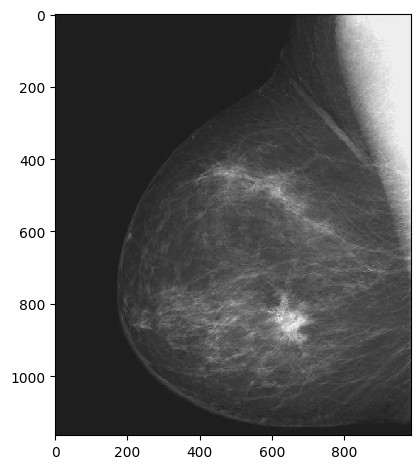

In [8]:
import skimage as sk
from skimage.io import imread
I = sk.io.imread('/content/drive/MyDrive/Colab Notebooks/Images/image1.tif')
sk.io.imshow(I)
sk.io.show()

Check image size:

In [9]:
I.shape

(1164, 984)

Access to origin pixel (top-left, DARK REGION)

In [10]:
I[0,0] #first row, first column

np.uint8(38)

In [11]:
I[0, 983] #first row, last column

np.uint8(238)

In [12]:
I.dtype

dtype('uint8')

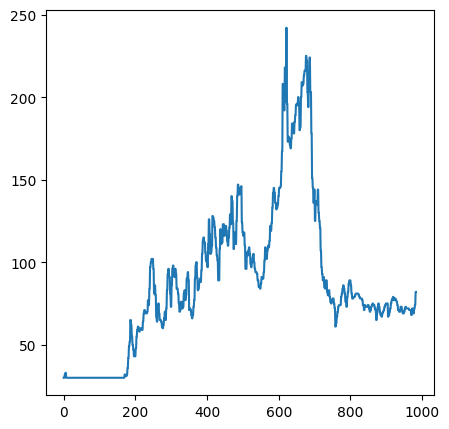

In [13]:
Irow = I[850, :]

import matplotlib.pyplot as plt
fig = plt.figure(figsize=(5,5))
plt.plot(Irow)
plt.show()

<ipython-input-14-b50b52a8d9db>:3: FutureWarning: `imshow` is deprecated since version 0.25 and will be removed in version 0.27. Please use `matplotlib`, `napari`, etc. to visualize images.
  sk.io.imshow(IC)
<ipython-input-14-b50b52a8d9db>:4: FutureWarning: `show` is deprecated since version 0.25 and will be removed in version 0.27. Please use `matplotlib`, `napari`, etc. to visualize images.
  sk.io.show()


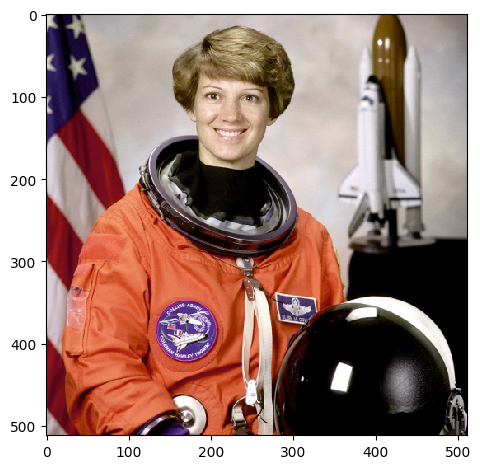

M=512 comulns, N = 512 rows, NC = 3 color channels


In [14]:
import skimage as sk
IC = sk.data.astronaut()
sk.io.imshow(IC)
sk.io.show()
print('M={} comulns, N = {} rows, NC = {} color channels'.format(*IC.shape))

In [15]:
IC.shape

(512, 512, 3)

Convert color to grayscale

In [16]:
IG = sk.color.rgb2gray(IC)
IG.shape

(512, 512)

In [17]:
IG[0,0]

np.float64(0.5834349019607843)

Using colormaps

<ipython-input-18-47f5b30555e3>:13: FutureWarning: `show` is deprecated since version 0.25 and will be removed in version 0.27. Please use `matplotlib`, `napari`, etc. to visualize images.
  sk.io.show()


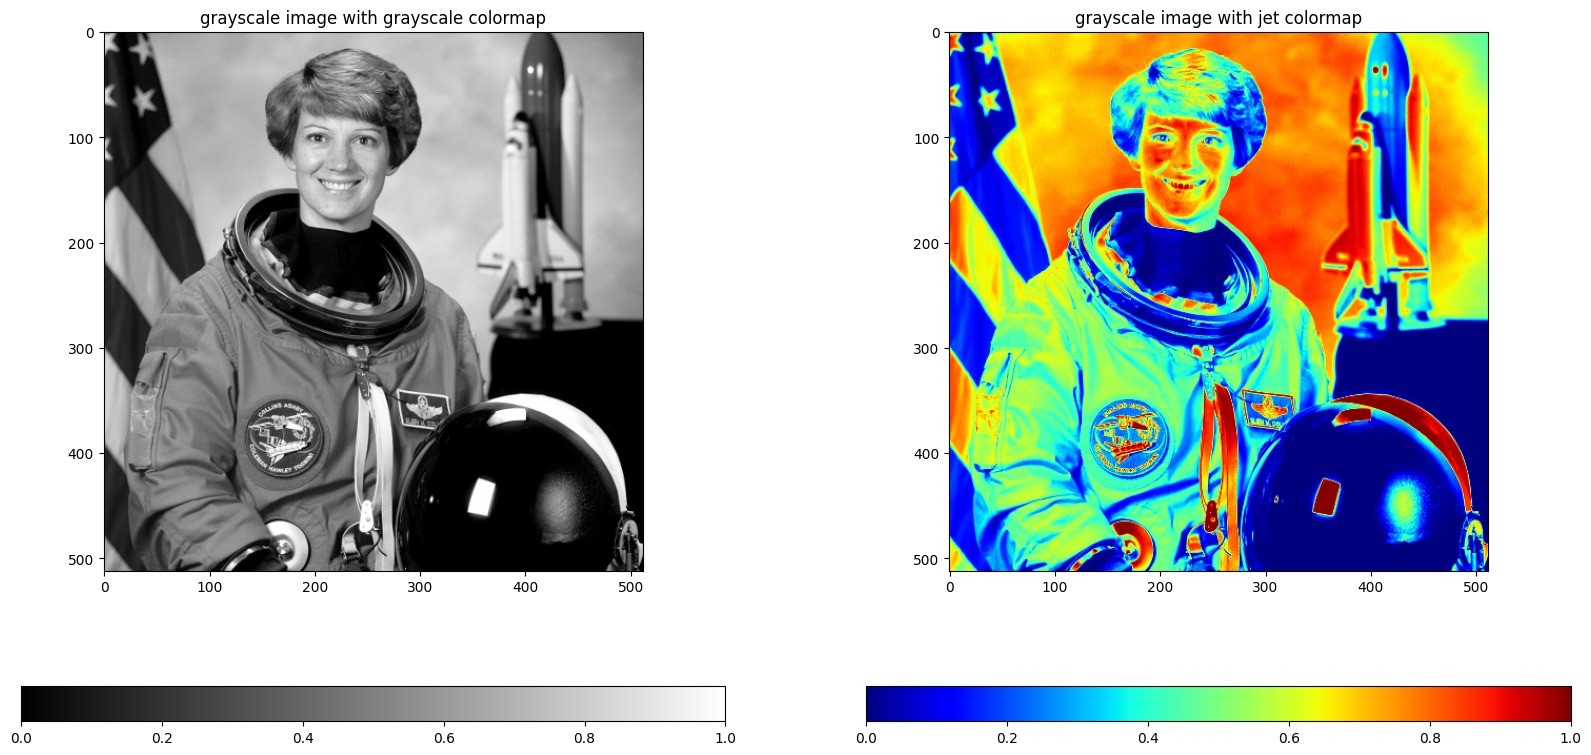

In [18]:
import matplotlib.pyplot as plt
fig,axes = plt.subplots(1,2, figsize=(20,10))
ax = axes.ravel() #convert axes to 1d array

im1 = ax[0].imshow(IG, cmap=plt.cm.gray)
ax[0].set_title('grayscale image with grayscale colormap')
fig.colorbar(im1,ax=ax[0],orientation='horizontal')

im2 = ax[1].imshow(IG, cmap=plt.cm.jet)
ax[1].set_title('grayscale image with jet colormap')
fig.colorbar(im2, ax=ax[1], orientation = 'horizontal')

sk.io.show()

Convert image to different formats

In [19]:
import numpy as np

from skimage.util import img_as_ubyte
IGB = img_as_ubyte(IG)

np.max(IGB)

np.uint8(255)

Image Histogram

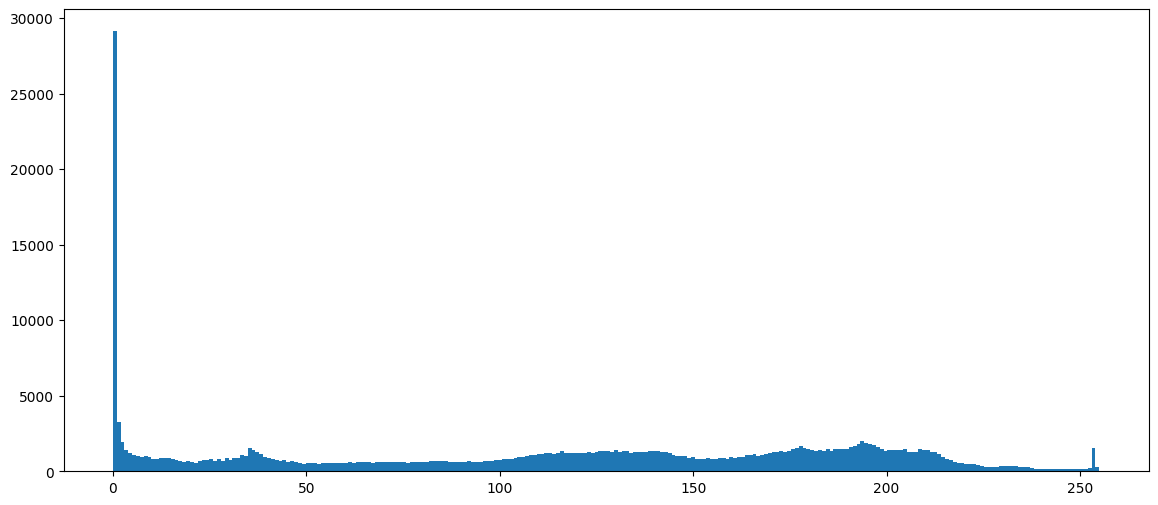

In [20]:
import matplotlib.pyplot as plt
import numpy as np

v = IGB.reshape(IGB.shape[0]*IGB.shape[1],1)

fig = plt.figure(figsize = (14,6))
plt.hist(v, bins = 256, density = False) #density = False, raw count of pixels
plt.show()

In [21]:
IGB.shape[0]*IGB.shape[1] #Total nr of pixels in the image

262144

In [22]:
v[v==0].shape[0] # Nr of pixels with value zero

29129

In [23]:
p0 = v[v==0].shape[0]/(IGB.shape[0]*IGB.shape[1]) # Probability of grapyscale level zero
print(p0)

0.11111831665039062


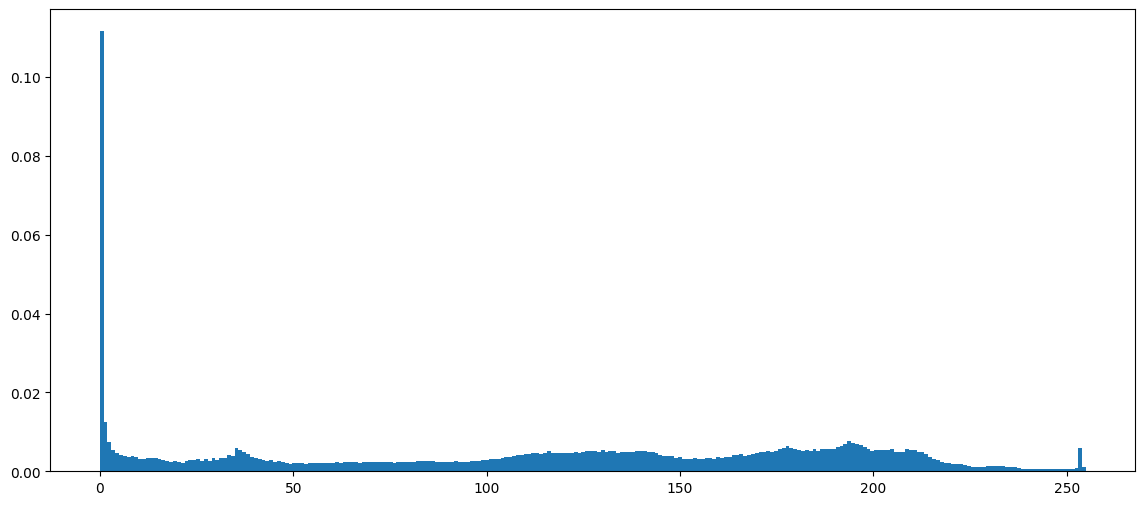

In [24]:
fig = plt.figure(figsize=(14,6))
plt.hist(v, bins = 256, density=True) #density = True, shows the probability density
plt.show()

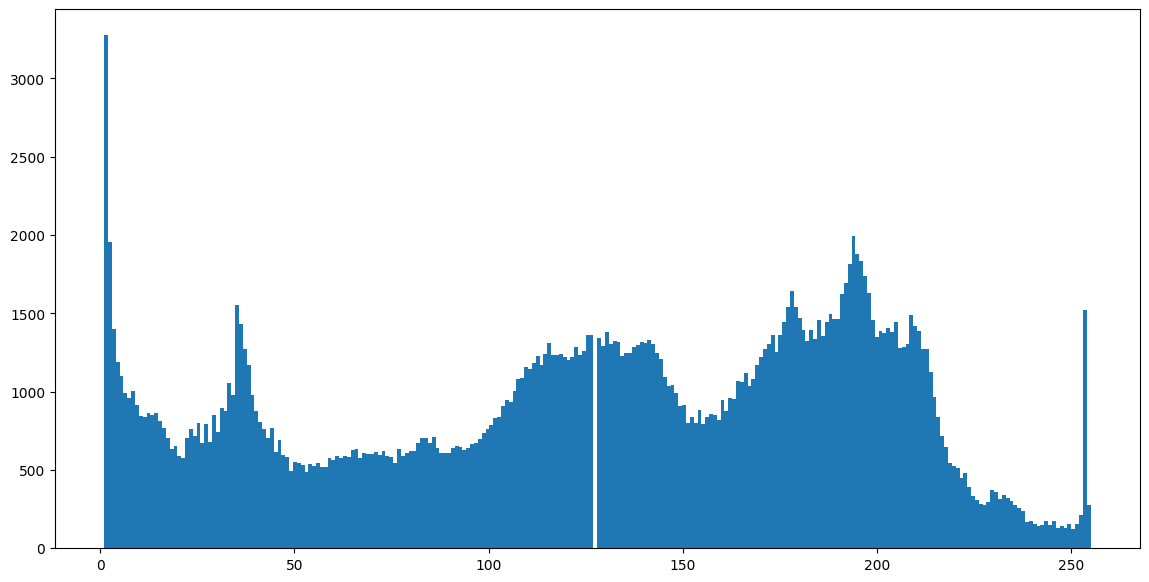

In [25]:
import matplotlib.pyplot as plt
import numpy as np

#keep only pixels with a value higher than zero
v=v[v>0]
fig = plt.figure(figsize=(14,7))
plt.hist(v, bins=256, density=False)
plt.show()

Represent the normalized histogram corresponding to the probability distribution function of the graylevel pixel occurence

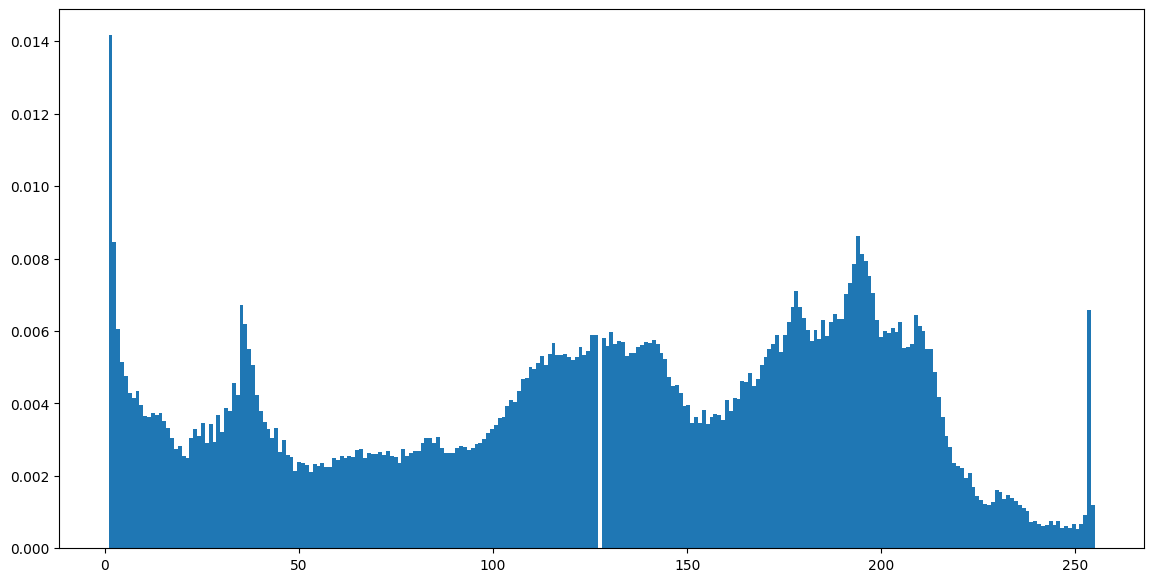

In [26]:
import matplotlib.pyplot as plt
import numpy as np

#keep only pixels with a value higher than zero
v=v[v>0]
fig = plt.figure(figsize=(14,7))
plt.hist(v, bins=256, density=True)
plt.show()

Cummulative probability distribution function (cdf) of grayscale levels: Area over the curve of the normalized histogram

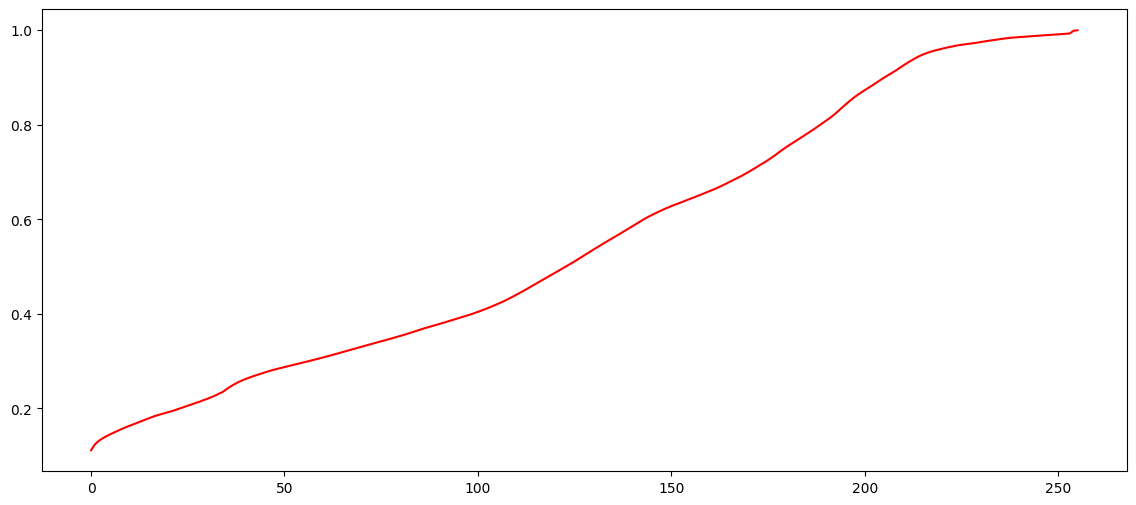

In [27]:
from skimage import exposure

img_cdf, bins = exposure.cumulative_distribution(IGB, 255)
fig = plt.figure(figsize = (14,6))
plt.plot(bins, img_cdf, 'r') # bins - pixel intesity value (x-axis), img_cdf - cdf (y-axis), r - red color
plt.show()

Compute the median of the image (grayscale level at which the cdf is 0.5):
It tells the gray level where, 50% of the pixels are darker and 50% are brighter



In [28]:
v = IGB.reshape(IGB.shape[0]*IGB.shape[1], 1) # v becomes a 1D array of all pixel values
np.median

<function median at 0x79489a506bb0>

Interactive Visualization

In [29]:
import plotly.express as px
import skimage as sk
from skimage import data
import numpy as np

cat = data.chelsea()
fig = px.imshow(cat)
fig.show()

Gaussian Blur - is a commonimage processing technique used to reduce noise, smooth images, or create a softening effect. It works by averaging pixel values with their neighbours, but wight these neighbors using a Gaussian function

A Gaussian function looks like a bell curve, and in 2D (for images), it's defined as:
x,y: distance from the center pixel
σ: standard deviation (controls the blur amount)

In [30]:
from plotly.subplots import make_subplots
import plotly.graph_objects as go
from skimage.filters import gaussian
from skimage import img_as_ubyte

cat = data.chelsea()
cat_filtered = img_as_ubyte(gaussian(cat, sigma=1)) #Applies Gaussian blur with sigma=1 to the image cat

fig = make_subplots(rows=1, cols=2, shared_xaxes = 'all', shared_yaxes = 'all')

fig.add_trace(go.Image(z=cat), 1,1)
fig.add_trace(go.Image(z=cat_filtered), 1, 2)
fig.update_layout(height = 800, width=800, title_text="Subplots with Shared Axes")
fig.show()

Basic mathematical problems

<ipython-input-31-dd54a592c5ef>:7: FutureWarning:

`imshow` is deprecated since version 0.25 and will be removed in version 0.27. Please use `matplotlib`, `napari`, etc. to visualize images.

<ipython-input-31-dd54a592c5ef>:8: FutureWarning:

`show` is deprecated since version 0.25 and will be removed in version 0.27. Please use `matplotlib`, `napari`, etc. to visualize images.



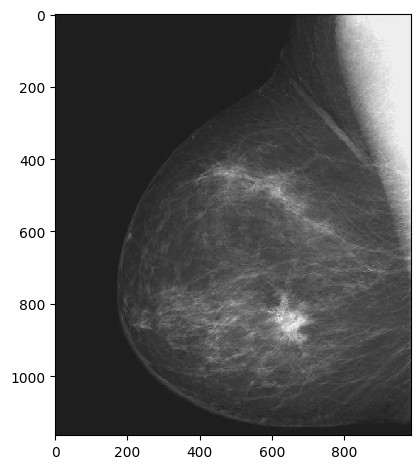

In [31]:
from ast import increment_lineno
#Pixel-wise distances
import skimage as sk
import matplotlib.pyplot as plt

I = sk.io.imread('/content/drive/MyDrive/Colab Notebooks/Images/image1.tif')
sk.io.imshow(I)
sk.io.show()
plt.show()

In [32]:
#Euclidean distance between two pixels:
from scipy.spatial.distance import pdist

X1 = np.array([10, 10]) #position of pixel 1 (row, col)
X2 = np.array([20, 20])
X = [X1, X2]
Y = pdist(X, 'euclidean')
print('Euclidean distance = {}'.format(*Y))

# which is equivalent to:
Y1 = np.sqrt(np.power(X1-X2,2).sum())

print('Y = {} and Y1 = {}'.format(*Y,Y1))

Euclidean distance = 14.142135623730951
Y = 14.142135623730951 and Y1 = 14.142135623730951


In [33]:
#Cityblock distance:
Y = pdist(X, 'cityblock')
print('Cityblock distance={}'.format(*Y))

#Chessboard distance(Chebishev)
Y = pdist(X, 'chebyshev')
print('Chessboard distance={}'.format(*Y))

Cityblock distance=20.0
Chessboard distance=10.0


In [34]:
# The Euclidean distance transform
a = np.array(([0,1,1,1,1], [0,0,1,1,1], [0,1,1,1,1], [0,1,1,1,0], [0,1,1,0,0]))

from scipy import ndimage #n-dimensional image processing
edt = ndimage.distance_transform_edt(a) #euclidean distance transform
edt

#For every 1 in the array, it computes the Euclidean distance to the nearest 0 (background pixel).
#The result is a float array of the same shape where:
#edt[i][j] tells you how far the pixel at (i, j) is from the nearest 0.

array([[0.        , 1.        , 1.41421356, 2.23606798, 3.        ],
       [0.        , 0.        , 1.        , 2.        , 2.        ],
       [0.        , 1.        , 1.41421356, 1.41421356, 1.        ],
       [0.        , 1.        , 1.41421356, 1.        , 0.        ],
       [0.        , 1.        , 1.        , 0.        , 0.        ]])

Set and Logical Operations

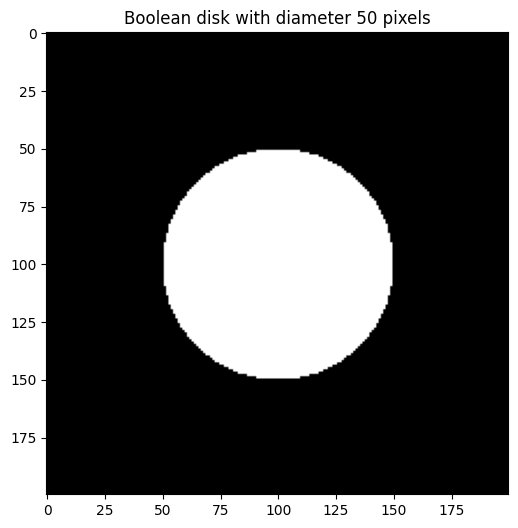

In [35]:
nrows, ncols = (200, 200)
row, col = np.ogrid[:nrows, :ncols]
cnt_row, cnt_col = nrows / 2, ncols / 2 #center of the image
disk_diameter = 50
outer_disk_mask = ((row - cnt_row)**2 + (col - cnt_col)**2 < (disk_diameter)**2)
# This creates a boolean mask, where pixels inside the circle are True, outside are False

fig = plt.figure(figsize=(6,6))
plt.imshow(outer_disk_mask, cmap = plt.cm.gray) #True as white, false as black
plt.title('Boolean disk with diameter {} pixels'.format(disk_diameter))
plt.show()

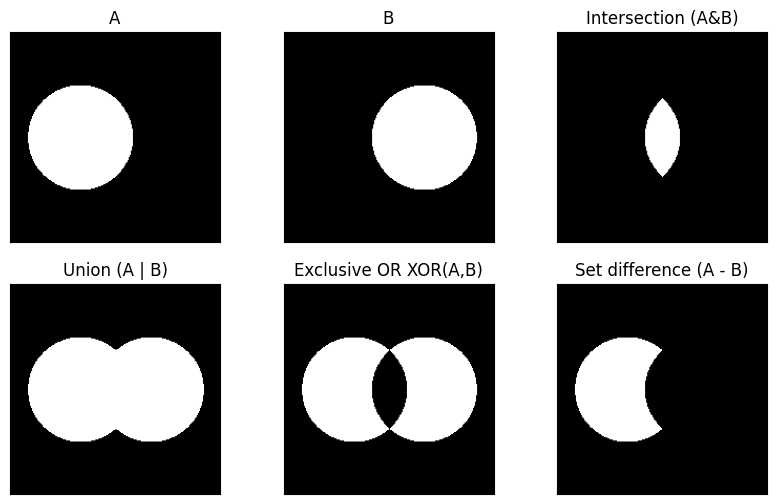

In [36]:
nrows, ncols = (200, 200)
row, col = np.ogrid[:nrows, :ncols]
cnt_row, cnt_col = nrows / 2, ncols / 2 #center of the image
disk_diameter = 50

cnt_row1, cnt_col1 = nrows / 2, ncols / 3
outer_disk_mask1 = ((row-cnt_row1)**2 + (col - cnt_col1)**2 < (disk_diameter)**2)

cnt_row2, cnt_col2 = nrows / 2, 2*ncols / 3
outer_disk_mask2 = ((row-cnt_row2)**2 + (col - cnt_col2)**2 < (disk_diameter)**2)

#Intersection (Logical AND)
I_and = outer_disk_mask1 & outer_disk_mask2

#Union (Logical OR)
I_or = outer_disk_mask1 | outer_disk_mask2

#Exclusive OR xor(A,B): Pixels that are in A but not in B
I_diff1 = np.logical_xor(outer_disk_mask1, outer_disk_mask2)

#Difference (A-B) = A&(not(B)):
I_diff2 = outer_disk_mask1 & np.logical_not(outer_disk_mask2)

fig = plt.figure(figsize=(10, 6))
plt.subplot(231), plt.imshow(outer_disk_mask1, cmap='gray')
plt.title('A'), plt.xticks([]), plt.yticks([])
plt.subplot(232),plt.imshow(outer_disk_mask2, cmap = 'gray')
plt.title('B'), plt.xticks([]), plt.yticks([])
plt.subplot(233),plt.imshow(I_and, cmap = 'gray')
plt.title('Intersection (A&B)'), plt.xticks([]), plt.yticks([])
plt.subplot(234),plt.imshow(I_or, cmap = 'gray')
plt.title('Union (A | B)'), plt.xticks([]), plt.yticks([])
plt.subplot(235),plt.imshow(I_diff1, cmap = 'gray')
plt.title('Exclusive OR XOR(A,B)'), plt.xticks([]), plt.yticks([])
plt.subplot(236),plt.imshow(I_diff2, cmap = 'gray')
plt.title('Set difference (A - B)'), plt.xticks([]), plt.yticks([])
plt.show()

Rectangle and disk

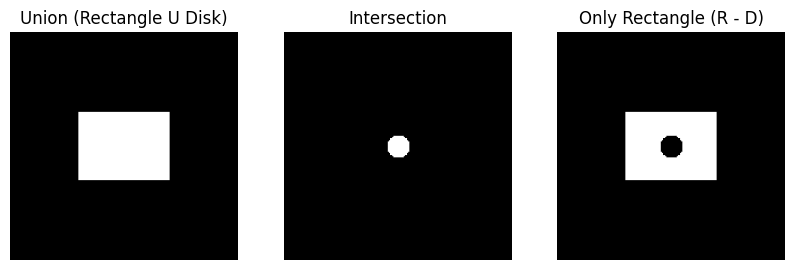

In [38]:
import numpy as np
rectangle = np.zeros((nrows, ncols), dtype=bool)
rectangle[70:130, 60:140] = True

disk = ((row - 100)**2 + (col - 100)**2 < 50*2)

# Union and intersection
union_rect_disk = rectangle | disk
intersect_rect_disk = rectangle & disk
only_rect = rectangle & np.logical_not(disk)

fig = plt.figure(figsize=(10,4))
plt.subplot(131), plt.imshow(union_rect_disk, cmap='gray')
plt.title('Union (Rectangle U Disk)'), plt.axis('off')
plt.subplot(132), plt.imshow(intersect_rect_disk, cmap='gray')
plt.title('Intersection'), plt.axis('off')
plt.subplot(133), plt.imshow(only_rect, cmap='gray')
plt.title('Only Rectangle (R - D)'), plt.axis('off')
plt.show()